In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

file_path = 'data/b_only_subset.csv'
out_B = 'data/csv/ucla_B.csv'
out_ret = 'data/csv/ucla_ret.csv'
out_smz = 'data/csv/ucla_smz.csv'
out_int = 'data/csv/ucla_int.csv'
out_cle = 'data/csv/ucla_cle.csv'
out_trl = 'data/csv/ucla_trl.csv'

df = pd.read_csv(out_int, delimiter=',')

In [22]:
df['figures'] = df['figures'].apply(lambda x: x.split(';') if isinstance(x, str) else [])
df['description'] = df['description'].apply(lambda x: x.split(';') if isinstance(x, str) else [])
df['genre'] = df['genre'].apply(lambda x: x.split(';') if isinstance(x, str) else [])

data_filtered = df[df['figures'].apply(lambda x: len(x) > 0)]
most_common_figure = data_filtered.groupby('year')['figures'].apply(lambda x: Counter(topic for topics in x for topic in topics).most_common(1)[0][0] if len(x) > 0 else None)
#print(most_common_figure)

data_filtered = df[df['description'].apply(lambda x: len(x) > 0)]
most_common_description = data_filtered.groupby('year')['description'].apply(lambda x: Counter(topic for topics in x for topic in topics).most_common(1)[0][0] if len(x) > 0 else None)
#print(most_common_description)

data_filtered = df[df['genre'].apply(lambda x: len(x) > 0)]
most_common_genre = data_filtered.groupby('year')['genre'].apply(lambda x: Counter(topic for topics in x for topic in topics).most_common(1)[0][0] if len(x) > 0 else None)
#print(most_common_genre)

year
1987    Jirous, Ivan Martin,
1991           Topol, Josef,
1992      Plíšková, Naděžda,
1993             Novák, Jan,
1994           Lopatka, Jan,
1995        Koubová, Ludmila
1996      Polišenský, Josef,
1997        Hrabal, Bohumil,
1998        Holub, Miroslav,
1999          Havel, Václav,
2000           Čapek, Karel,
2001          Franc, Václav,
2002          Franc, Václav,
2003        Viewegh, Michal,
2004        Viewegh, Michal,
2005        Viewegh, Michal,
2006         Kundera, Milan,
2007          Havel, Václav,
2008          Havel, Václav,
2009          Havel, Václav,
2010          Havel, Václav,
2011          Havel, Václav,
2012          Havel, Václav,
2013          Havel, Václav,
2014        Hrabal, Bohumil,
2015               Hus, Jan,
2016          Havel, Václav,
2017          Topol, Jáchym,
2018           Čapek, Karel,
2019         Kundera, Milan,
2020         Kundera, Milan,
2021         Kundera, Milan,
2022      Tučková, Kateřina,
2023         Kundera, Milan,
Name: fig

In [20]:
import re
from collections import Counter

def flatten_list(strings):
    flattened_list = []
    for item in strings:
        if isinstance(item, str):  # If item is a string, add it directly to the flattened list
            flattened_list.append(item)
        else:  # If item is a list, recursively flatten it
            flattened_list.extend(flatten_list(item))
    return flattened_list

all_genre = flatten_list(df.genre)
counted_genre = Counter(all_genre)
#print(counted_genre)


all_description = flatten_list(df.description)
counted_description = Counter(all_description)
#print(counted_description)

all_figures = flatten_list(df.figures)
counted_figures = Counter(all_figures)
#print(counted_figures)

Counter({'recenze': 17157, 'zprávy': 7310, 'česká poezie': 6991, 'rozhovory': 6840, 'články': 5813, 'bio-bibliografické poznámky': 4192, 'úryvky': 2841, 'české povídky': 2570, 'anotace': 1886, 'glosy': 1540, 'komentáře': 1479, 'nekrology': 1268, 'medailony': 1214, 'referáty': 1003, 'české prózy': 844, 'české romány': 779, 'reportáže': 740, 'poznámky': 724, 'biografické poznámky': 666, 'úvahy': 442, 'fejetony': 433, 'vzpomínky': 390, 'studie': 389, 'pozvánky': 355, 'úvodníky': 325, 'eseje': 308, 'ankety': 280, 'přehledy': 243, 'polemiky': 217, 'sloupky': 171, 'portréty': 142, 'paměti': 127, 'seznamy': 122, 'biografie': 118, 'projevy': 105, 'videozáznamy': 98, 'dopisy': 94, 'programy': 94, 'citáty': 93, 'komiksy': 91, 'deníky': 89, 'české pohádky': 75, 'aforismy': 69, 'české novely': 62, 'fantasy romány': 62, 'kritiky': 60, 'diskuse': 59, 'monografie': 53, 'upoutávky': 51, 'fotografie': 46, 'stati': 46, 'slovenská poezie': 46, 'poezie v próze': 41, 'podcasty': 40, 'písňové texty': 38, 's

In [29]:
ten_most_common_genre = [item[0] for item in counted_genre.most_common(10)]

# Count records per genre
genre_counts = {}

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    year = row['year']
    genre_list = row['genre']
    
    # Iterate over each genre in the genres list for the current row
    for genre in genre_list:
        # Increment the count for the current genre and year
        genre_year = (genre, year)
        genre_counts[genre_year] = genre_counts.get(genre_year, 0) + 1

# Extract unique genres and years
genres = list(set([topic for topic, _ in genre_counts.keys()]))
years = list(set([year for _, year in genre_counts.keys()]))

# Sort the genres and years in ascending order
genres.sort()
years.sort()



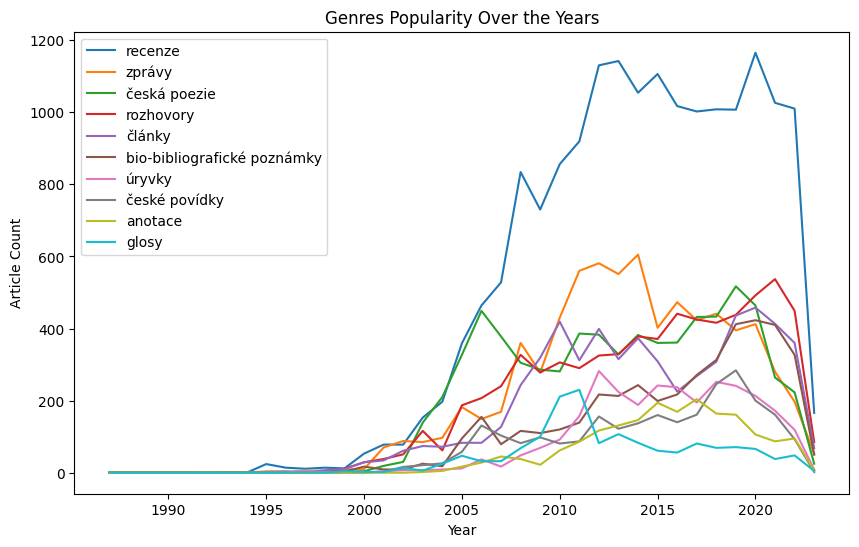

In [30]:
# Create a line chart
plt.figure(figsize=(10, 6))  # Set the figure size (optional)

# Plot the lines for each topic
for genre in ten_most_common_genre:
    counts = [genre_counts.get((genre, year), 0) for year in years]
    plt.plot(years, counts, label=genre)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Article Count')
plt.title('Genres Popularity Over the Years')

# Add a legend
plt.legend()

# Display the chart
plt.show()